# 57. 

sys 모듈을 사용하면 이 프롬프트를 바꿀 수가 있지요.  
system specific parameters & functions

In [73]:
dir(sys)

['__breakpointhook__',
 '__displayhook__',
 '__doc__',
 '__excepthook__',
 '__interactivehook__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__stderr__',
 '__stdin__',
 '__stdout__',
 '__unraisablehook__',
 '_base_executable',
 '_clear_type_cache',
 '_current_frames',
 '_debugmallocstats',
 '_framework',
 '_getframe',
 '_git',
 '_home',
 '_xoptions',
 'abiflags',
 'addaudithook',
 'api_version',
 'argv',
 'audit',
 'base_exec_prefix',
 'base_prefix',
 'breakpointhook',
 'builtin_module_names',
 'byteorder',
 'call_tracing',
 'copyright',
 'displayhook',
 'dont_write_bytecode',
 'exc_info',
 'excepthook',
 'exec_prefix',
 'executable',
 'exit',
 'flags',
 'float_info',
 'float_repr_style',
 'get_asyncgen_hooks',
 'get_coroutine_origin_tracking_depth',
 'getallocatedblocks',
 'getdefaultencoding',
 'getdlopenflags',
 'getfilesystemencodeerrors',
 'getfilesystemencoding',
 'getprofile',
 'getrecursionlimit',
 'getrefcount',
 'getsizeof',
 'getswitchinterval',
 'gettrace',


In [26]:
import sys
import tensorflow as tf
import numpy as np

In [32]:
dir(sys.stdout.write)
# dir(sys.stdin.write)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

### MLP 모델로 이미지 분류해보기

In [30]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape) 
# 28 x 28의 이미지가 60,000장
# w x h 
print(Y_train.shape) 
# [ 5, 1, 2, 3, 4, 4,   .... ]

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


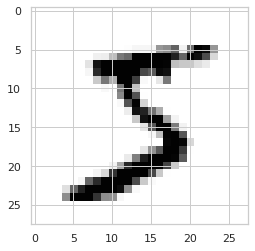

In [28]:
# MNIST 데이터를 시각화하기 
import matplotlib.pyplot as plt
print(Y_train[0])

plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

`MNIST 데이터`는 위와 같이 이미지처럼 나타낼 수 있지만  
사실은 2차원 배열에 픽셀 값이 저장되어 있는 형태입니다.  
즉 0과 255 사이의 정수로 구성된 데이터

`sys.stdout.write`  
(string: str) -> int

Write to current stream after encoding if necessary

print()는 기본적으로 실행될 때 마다 줄을 바꾸게 된다.  
같은 줄에 쓰려면 '\r'을 적용하고, 플러싱을 하면 된다.  
저수준의 stdout.write()를 사용

In [35]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


`MLP(Multi Layer Perceptron)`의 입력 데이터는 기본적으로 벡터 형태   
X_train은 28 x 28 크기의 MNIST 데이터 60,000개가 모여 있는 배열이기 때문에,  
각각의 데이터를 __(28, 28) 크기의 행렬(2차원)__에서  
길이가 28 x 28 = __784인 벡터(1차원)__로 변형  
X_test에 포함된 데이터도 reshape() 함수를 사용하여 크기로  

In [36]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [35]:
print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


In [37]:
28 * 28

784

In [36]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') 
# 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

X_train의 경우  
(60000, 28, 28) -> (60000, 784)로 변형

In [37]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [39]:
Y_train.shape, Y_test.shape

((60000,), (10000,))

label의 경우 현재 0~9의 정수 값을 가지고 있다.  
이 값들을 분류 문제에 맞게 one-hot vector로 만들어줍시다.  
Y_train, Y_test의 shape을 다시 보면   
길이가 10인 벡터 60,000개(test는 10,000개)가 묶인 형태로 바뀐 것을 확인

In [38]:
# Label 값을 One-hot encoding 하기 
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

`원-핫 인코딩`  
"단어 집합의 크기를 벡터의 차원으로 하고,  
표현하고 싶은 단어의 인덱스에 1의 값을 부여하고,  
다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식이며  
이렇게 표현된 벡터를 `One-Hot vector`

In [39]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


`MLP 모델` 
-> Functional API로 만들어 봅시다.

$$input layer + 두 개의 hidden layer + output layer$$  

특히 output layer는 특별한 task를 수행하는데,  
이 경우에는 10개의 class를 분류 (multi-class classification)하는 것입니다.  
만약 output layer의 perceptron이 회귀 문제에서와 같이 실수 출력 값을 가진다면  
수행하고자 하는 분류 task에 적절하지 않습니다.  
왜냐 하면 분류 문제에서 label 값은 one-hot vector로 인코딩되고,  
이것은 특정 클래스에 속할 확률이 1이라고 해석될 수 있기 때문입니다.  
그러므로 10개의 perceptron에서 나온 출력을 확률 값으로 만들기 위해  
활성화 함수로 softmax를 사용해야 합니다.

In [40]:
# 모델 설계하기 
input_layer = tf.keras.layers.Input(shape=(784,)) 
# input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) 
# hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) 
# hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [41]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy

model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [42]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, 
                    validation_split=0.2, 
                    epochs=30, batch_size=1000, 
                    verbose=1)
print(history.history.keys())

Epoch 1/30
48/48 [==============================] - 1s 9ms/step - loss: 12.8917 - categorical_accuracy: 0.8028 - val_loss: 1.4256 - val_categorical_accuracy: 0.9263
Epoch 2/30
48/48 [==============================] - 0s 5ms/step - loss: 0.9809 - categorical_accuracy: 0.9357 - val_loss: 0.8048 - val_categorical_accuracy: 0.9427
Epoch 3/30
48/48 [==============================] - 0s 5ms/step - loss: 0.4640 - categorical_accuracy: 0.9567 - val_loss: 0.6508 - val_categorical_accuracy: 0.9466
Epoch 4/30
48/48 [==============================] - 0s 5ms/step - loss: 0.2445 - categorical_accuracy: 0.9694 - val_loss: 0.5458 - val_categorical_accuracy: 0.9503
Epoch 5/30
48/48 [==============================] - 0s 5ms/step - loss: 0.1305 - categorical_accuracy: 0.9802 - val_loss: 0.5383 - val_categorical_accuracy: 0.9513
Epoch 6/30
48/48 [==============================] - 0s 5ms/step - loss: 0.0762 - categorical_accuracy: 0.9864 - val_loss: 0.4792 - val_categorical_accuracy: 0.9526
Epoch 7/30
48/4

- val_loss: 0.4361  
- val_categorical_accuracy: 0.9545  

dict_keys  
(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [43]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[12.89166259765625, 0.9809005260467529, 0.4640209972858429, 0.2444572001695633, 0.13050080835819244, 0.0762455090880394, 0.038318268954753876, 0.018650606274604797, 0.008040373213589191, 0.004448294173926115, 0.001777322730049491, 0.0007930284482426941, 0.0003108324599452317, 0.0001730733783915639, 0.00014392295270226896, 0.00012834886729251593, 0.00011768798140110448, 0.00010897342144744471, 0.00010152990580536425, 9.530080569675192e-05, 8.986041211755946e-05, 8.488338062306866e-05, 8.058592356974259e-05, 7.670155900996178e-05, 7.295281830010936e-05, 6.967735680518672e-05, 6.67390922899358e-05, 6.38974888715893e-05, 6.128334644017741e-05, 5.874842463526875e-05]


In [44]:
# Validation loss 확인하기
val_loss = history.history['val_loss']
print(val_loss)

[1.4255510568618774, 0.8047819137573242, 0.6507622599601746, 0.5458381175994873, 0.5382752418518066, 0.4791600704193115, 0.4906937777996063, 0.47350072860717773, 0.4645492434501648, 0.46106815338134766, 0.4590197205543518, 0.4566013514995575, 0.4546448290348053, 0.45359912514686584, 0.4534975588321686, 0.4534298777580261, 0.45319312810897827, 0.4532683193683624, 0.4531771242618561, 0.45323559641838074, 0.45334556698799133, 0.4534565806388855, 0.4531506299972534, 0.45317354798316956, 0.4532788097858429, 0.4532713294029236, 0.4535340666770935, 0.45339372754096985, 0.45331621170043945, 0.45335787534713745]


In [45]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.4492 - categorical_accuracy: 0.9576

 Test Accuracy: 0.9576


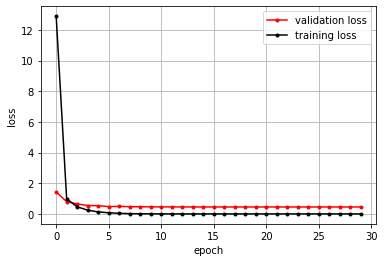

In [48]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, 
         marker='.', c="red", 
         label='validation loss')
plt.plot(x_len, loss, 
         marker='.', c="k", 
         label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Training loss과 test loss가 모두 아주 낮은 것을 확인할 수 있습니다.  
따라서 학습한 모델이 매우 좋은 예측 성능을 보일 것으로 예상할 수 있습니다.

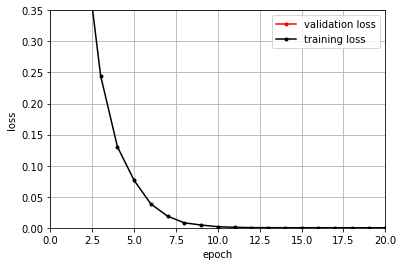

In [49]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, 
         marker='.', c="red", 
         label='validation loss')
plt.plot(x_len, loss, 
         marker='.', c="k", 
         label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [40]:
# OpenCV 모듈 불러오기
import cv2

In [55]:
# 다시 한번 MNIST 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

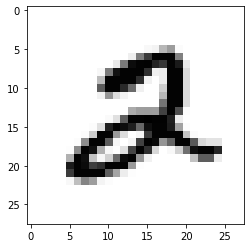

In [56]:
plt.imshow(X_train[5], cmap='Greys')

이번에는 MNIST 데이터에 장난을 조금 쳐보겠습니다.  
OpenCV의 함수들을 이용해서  
MNIST 이미지에 회전 변환과 이동 변환(선형 변환)을 적용합니다.

선형 변환을 위해서 변환 매트릭스를 먼저 구하고,  
이미지에 변환 매트릭스를 적용해 봅시다.  
즉 원본 이미지에 선형 변환 매트릭스를 곱하여  
원본 이미지를 변환하는 것입니다.

`getRotationMatrix2D`(center, angle, scale) -> retval

In [57]:
#getRotationMatrix2D(center, angle, scale) -> retval
cv2.getRotationMatrix2D((20, 25), 20, 1)

array([[ 0.93969262,  0.34202014, -7.344356  ],
       [-0.34202014,  0.93969262,  8.34808735]])

In [58]:
cv2.getRotationMatrix2D((20, 25), 20, 1)[0]

array([ 0.93969262,  0.34202014, -7.344356  ])

In [59]:
# 이미지 회전 변환 메트릭스 구하기 
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28)) 
## image에 matrix 곱

In [60]:
M

array([[ 0.93969262,  0.34202014, -4.344356  ],
       [-0.34202014,  0.93969262, 11.34808735]])

In [61]:
#warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
cv2.warpAffine(X_train[5], M, (28, 28)) 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [62]:
cv2.warpAffine(X_train[5], M, (28, 28)).shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

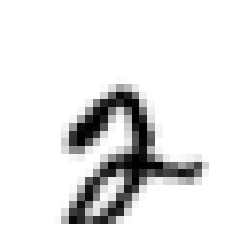

In [68]:
plt.imshow(test_image, cmap='Greys')
plt.axis("off")

In [21]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [69]:
test_image_reshape

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [22]:
Y_prediction = model.predict(test_image_reshape)

In [70]:
Y_prediction

array([[9.1902432e-12, 9.0826198e-08, 1.2966283e-02, 2.7457789e-01,
        8.4481552e-02, 2.9114544e-05, 6.2304312e-01, 7.3162548e-05,
        5.4380318e-05, 4.7744843e-03]], dtype=float32)

In [71]:
np.argmax(Y_prediction)

6

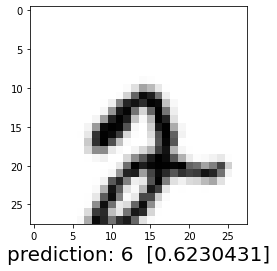

In [23]:
index = np.argmax(Y_prediction) 
# 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출 
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()

In [72]:
value

array([0.6230431], dtype=float32)

# 59. 

원본 RGB 이미지에는 R, G, B 3개의 채널이 있기 때문에 간단한 실습을 위해  
rgb2gray 함수로 이미지를 흑백으로 변환합니다.

In [1]:
# 필요한 모듈 불러오기
import numpy as np
from scipy.signal import convolve2d # 2D convolution 연산
from skimage.io import imread, imshow # 데이터를 이미지로 보여주기
from skimage.color import rgb2gray 
# RGB 채널값을 가진 이미지 데이터를, 흑백 이미지의 데이터로 변환하기

In [2]:
cd ~

/aiffel


`imread`  
(fname, as_gray=False, plugin=None, **plugin_args)

Load an image from file.

In [3]:
cat = rgb2gray(imread('data/cat.jpg')) # read image

In [7]:
cat

array([[0.81598392, 0.80814078, 0.88293333, ..., 0.08751843, 0.11104784,
        0.11104784],
       [0.76500353, 0.77284667, 0.8434349 , ..., 0.06624392, 0.08977333,
        0.0936949 ],
       [0.78853294, 0.81206235, 0.84735647, ..., 0.04830275, 0.07800863,
        0.08977333],
       ...,
       [0.70269882, 0.67132627, 0.69877725, ..., 0.87116863, 0.86724706,
        0.87901176],
       [0.64753686, 0.6601349 , 0.67860392, ..., 0.89441529, 0.88265059,
        0.87480745],
       [0.64361529, 0.6601349 , 0.67468235, ..., 0.88265059, 0.87088588,
        0.86304275]])

흑백 고양이 사진은 3,266개의 행과 4,899개의 열로 이루어진 1-channel 이미지  
행렬 안에는 0과 1 사이의 값으로 정규화된 픽셀 값이 들어 있습니다.

In [8]:
cat.shape

(3266, 4899)

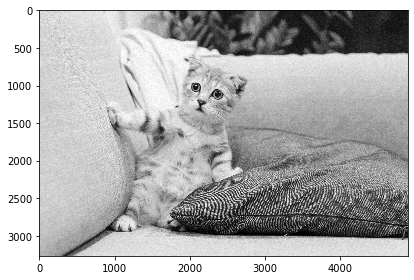

In [10]:
imshow(cat);

이미지를 분석할 때, 이미지에 숨겨져 있는 패턴을 찾아내는 '패턴 추출기'를 만들 수 있을까요? 이미지 분석의 경우에는 filter라는 이름의 패턴 추출기를 사용합니다.  


`Edge Detection, Sharpen, Gaussian Blur filter`

filter는 그냥 봤을 때는 그저 숫자 덩어리이에요.  
하지만 filter를 이용해서 convolution 연산을 하게 되면,  
이미지 안에 숨겨져 있던 패턴이 드러나게 됩니다.  
따라서 이미지 분석에서 중요한 것은 이미지 내에 숨겨진 다양하고 복잡한 패턴을 추출해줄 수 있는 다양한 filter를 만들어 내는 것입니다.



In [14]:
# Edge Detection
edge = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

### sharpen

`convolve2d`  
(in1, in2, mode='full', boundary='fill', fillvalue=0)

Convolve two 2-dimensional arrays.

in1 : array_like  

in2 : array_like     
    
mode : str {'full', 'valid', 'same'},

In [12]:
edge_im = convolve2d(cat, edge, 'valid')

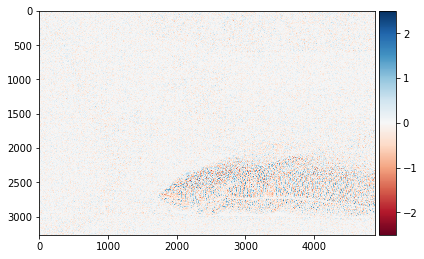

In [13]:
imshow(edge_im);

### Gaussian Blur

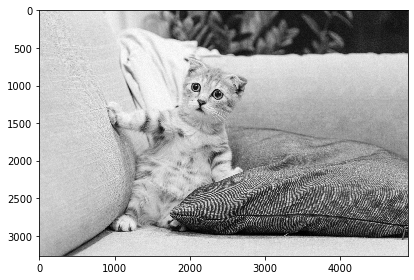

In [15]:
blur_im = convolve2d(cat, blur, 'full')
imshow(blur_im)

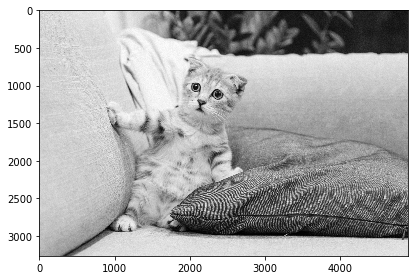

In [15]:
imshow(blur_im)

# 61. 
2D convolutional layer는 tf.keras.layers.Conv2D 객체를 생성  
Conv2D 객체의 자료형은 keras.engine.keras_tensor.KerasTensor입니다.  
모델을 생성할 때, tf.keras.layers.Input 레이어를 맨 처음에 정의해야 합니다. 여기서는 (28, 28, 1) 크기의 데이터를 입력받는 input layer를 생성  
input_layer.shape 결과에서 처음 보이는 None은 데이터셋의 batch size에 해당  
x라는 레이어 객체는 output 채널이 4개인 convolutional layer이므로   
x.shape의 결과는 (None, 28, 28, 4)

레이어를 생성할 때  
output = Conv2D(params)(input) 형태로  
input과 output 변수를 넣고,  
이전 레이어의 output을 다음 레이어의 input으로 설정함으로써  
레이어들이 서로 연결되도록 

In [1]:
import tensorflow as tf

In [2]:
# 가로 28, 세로 28, 채널 수 1의 input 데이터를 받는 input layer 생성하기
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) 

# 커널의 가로 세로 사이즈는 3이고, 채널 수는 4, zero-padding을 넣고, stride는 1로한 Conv2D layer
x = tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=1, 
                           padding='same', activation='relu')(input_layer) 
print(type(x))
print(x)

<class 'keras.engine.keras_tensor.KerasTensor'>
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 4), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [3]:
print(input_layer.shape)
print(x.shape)

(None, 28, 28, 1)
(None, 28, 28, 4)


패딩을 사용했기 때문에 input과 동일한 가로 세로 사이즈를 가지고 있고,  
채널 수를 4로 했기 때문에 feature map의 채널 수도 4

### pooling layer가 포함된 CNN 모델 구현
(27, 27, 1) 크기의 입력을 받는 input_tensor와 Conv2D 레이어 x1,  
그리고 pooling layer에 해당하는 MaxPooling2D 레이어 x2로 구성되어 있습니다.

`tf.keras.layers.MaxPooling2D`  
(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Docstring:     
Max pooling operation for 2D spatial data.

In [4]:
input_tensor = tf.keras.layers.Input(shape=(27, 27, 1))

# 커널의 가로 세로 사이즈는 2이고, stride는 2인 Conv2D layer
x1 = tf.keras.layers.Conv2D(filters=5, kernel_size=2, strides=2, 
                            padding='same', activation='relu')(input_tensor) 

# 가로 세로 사이즈가 2인 영역에서 최대값을 뽑는 Maxpooling을 적용
x2 = tf.keras.layers.MaxPooling2D(2)(x1) 
print(x1)
print(x2)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 5), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 5), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")


In [5]:
input_layer = tf.keras.layers.Input(shape=(7, 7, 5))
convlayer1 = tf.keras.layers.Conv2D(filters=4, kernel_size=3, 
                                    strides=1, padding='same')(input_layer)
convlayer2 = tf.keras.layers.Conv2D(filters=8, kernel_size=3, 
                                    strides=1, padding='valid')(convlayer1)
pooling = tf.keras.layers.MaxPooling2D(2)(convlayer2)

model = tf.keras.Model(inputs=input_layer, outputs=pooling)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 7, 7, 5)]         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 4)           184       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 8)           296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 8)           0         
Total params: 480
Trainable params: 480
Non-trainable params: 0
_________________________________________________________________


In [6]:
input_layer

<KerasTensor: shape=(None, 7, 7, 5) dtype=float32 (created by layer 'input_3')>

In [7]:
convlayer1

<KerasTensor: shape=(None, 7, 7, 4) dtype=float32 (created by layer 'conv2d_2')>

In [8]:
convlayer2

<KerasTensor: shape=(None, 5, 5, 8) dtype=float32 (created by layer 'conv2d_3')>

In [9]:
pooling

<KerasTensor: shape=(None, 2, 2, 8) dtype=float32 (created by layer 'max_pooling2d_1')>

### 이미지 분류 CNN 모델

`tf.keras.layers.Conv2D`  
(
    __filters,
    kernel_size,
    strides=(1, 1),
    padding='valid'__,
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    __activation=None__,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)

padding: one of `"valid"` or `"same"` (case-insensitive).  
   `"valid"` means no padding.   
   `"same"` results in padding with zeros evenly
    to the left/right or up/down of the input such that output has the same height/width dimension as the input.

In [10]:
input_tensor = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, 
                           padding='same', activation='relu')(input_tensor) 
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, 
                           activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야 합니다.
x = tf.keras.layers.Flatten()(x) 

# Flatten 된 결과를 100의 노드를 가진 Fuly Connected Layer와 연결 
x = tf.keras.layers.Dense(100, activation='relu')(x) 
output = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1081700   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010

In [11]:
320 + 18496 + 1081700 + 1010

1101526

# 62. 

### Naïve Inception module from scratch

In [1]:
# 인셉션 모듈을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화

`keras.layers.Conv2D`  
(
    __filters,
    kernel_size,
    strides=(1, 1),
    padding='valid'__,
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    __activation=None__,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)

`keras.layers.MaxPooling2D`  
(
   __pool_size=(2, 2),
    strides=None,
    padding='valid'__,
    data_format=None,
    **kwargs,
)

In [2]:
# Naïve Inception 블록을 만들기 위한 함수
def naive_inception(input_layer, 
                    conv1_filter, conv3_filter, conv5_filter):
    
	# 1x1 사이즈의 kernel을 이용한 convolution2d layer
	conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', 
                                activation='relu')(input_layer)
    
	# 3x3 사이즈의 kernel을 이용한 convolution2d layer
	conv3 = keras.layers.Conv2D(conv3_filter, (3,3), padding='same', 
                                activation='relu')(input_layer)
    
	# 5x5 사이즈의 kernel을 이용한 convolution2d layer
	conv5 = keras.layers.Conv2D(conv5_filter, (5,5), padding='same', 
                                activation='relu')(input_layer)
    
	# 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
	pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), 
                                     padding='same')(input_layer)
    
	# 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
	out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
	return out_layer

In [3]:
input_data = keras.layers.Input(shape=(256, 256, 3))

naive_inception_out = naive_inception(input_data, 64, 128, 32)

In [4]:
input_data

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>

In [5]:
naive_inception_out

<KerasTensor: shape=(None, 256, 256, 227) dtype=float32 (created by layer 'concatenate')>

>64 - conv1 -> 256   
128 - conv3 -> 256  
32 - conv5 -> 227

In [6]:
print(naive_inception_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 227), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


`Model` groups layers   
into an object with training and inference features.

In [7]:
# 모델 만들기
model = keras.models.Model(inputs= input_data,
                           outputs= naive_inception_out)
# 생성한 모델의 구조 확인하기
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 256         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 128 3584        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 2432        input_1[0][0]                    
______________________________________________________________________________________________

`plot_model`  
(
    __model,
    to_file='model.png',
    show_shapes=False__,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

Converts a Keras model to dot format and save to a file.

`show_shapes`: whether to display shape information.

from tensorflow.keras.utils import plot_model # 모델 시각화

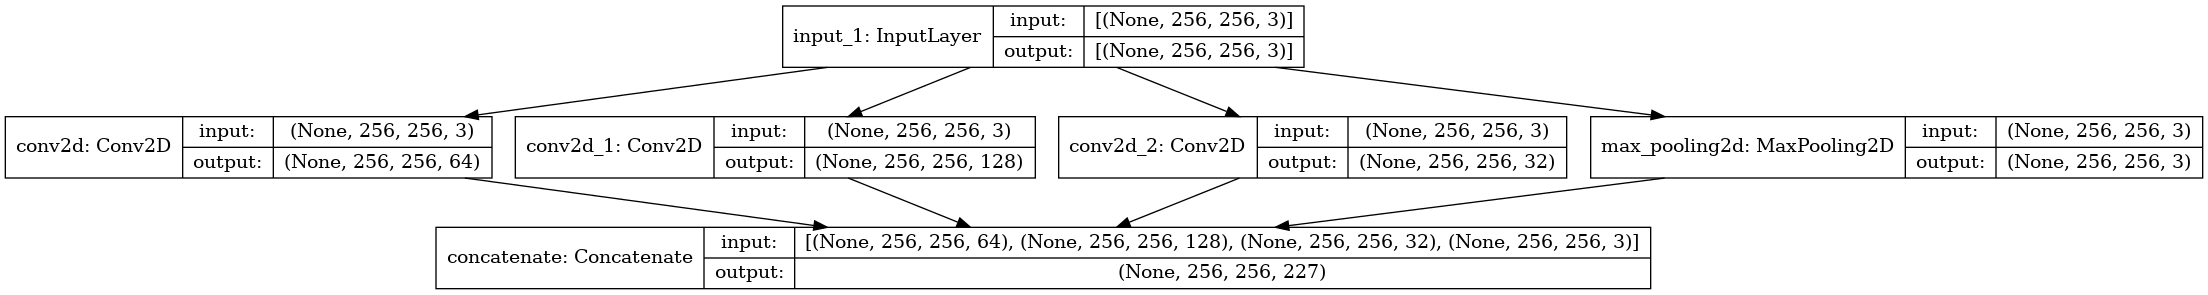

In [8]:
# 모델 구조 시각화하기
plot_model(model, show_shapes=True, 
           to_file='naive_inception_module.png')

### Inception module with 1x1 convolution

In [9]:
# 인셉션 모듈을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화

`keras.layers.Conv2D`  
(
    __filters,
    kernel_size,
    strides=(1, 1),
    padding='valid'__,
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    __activation=None__,

In [10]:
# Inception 블록을 만들기 위한 함수
def inception(input_layer, 
              conv1_filter, 
              conv3_in, conv3_out, 
              conv5_in, conv5_out, 
              pooling_out):
    
	# 1x1 사이즈의 kernel을 이용한 convolution2d layer
	conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', 
                                activation='relu')(input_layer)
    
	# 3x3 사이즈의 kernel을 이용한 convolution2d layer
	conv3 = keras.layers.Conv2D(conv3_in, (1,1), padding='same', 
                                activation='relu')(input_layer) 
    # Naive 버전과 가장 차별화되는 부분: 1x1 convolution
    
	conv3 = keras.layers.Conv2D(conv3_out, (3,3), padding='same', 
                                activation='relu')(conv3)
    
	# 5x5 사이즈의 kernel을 이용한 convolution2d layer
	conv5 = keras.layers.Conv2D(conv5_in, (1,1), padding='same', 
                                activation='relu')(input_layer)
    
	conv5 = keras.layers.Conv2D(conv5_out, (5,5), padding='same', 
                                activation='relu')(conv5)
    
	# 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
	pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), 
                                     padding='same')(input_layer)
    
	pool = keras.layers.Conv2D(pooling_out, (1,1), 
                               padding='same', activation='relu')(pool)
    
	# 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
	out_layer = keras.layers.Concatenate()([conv1, conv3, 
                                            conv5, pool])
	return out_layer

In [11]:
input_data = keras.layers.Input(shape=(256, 256, 3))
inception_out = inception(input_data, 
                          64, 
                          96, 128, 
                          16, 32, 
                          32)

In [12]:
input_data

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_2')>

In [13]:
inception_out

<KerasTensor: shape=(None, 256, 256, 256) dtype=float32 (created by layer 'concatenate_1')>

In [14]:
print(inception_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 256), dtype=tf.float32, name=None), name='concatenate_1/concat:0', description="created by layer 'concatenate_1'")


In [15]:
# 모델 만들기
model = keras.models.Model(inputs=input_data, 
                           outputs=inception_out)
# 생성한 모델의 구조 확인하기
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 256, 256, 96) 384         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 256, 256, 16) 64          input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 256, 256, 3)  0           input_2[0][0]                    
____________________________________________________________________________________________

`show_shapes`: whether to display shape information.

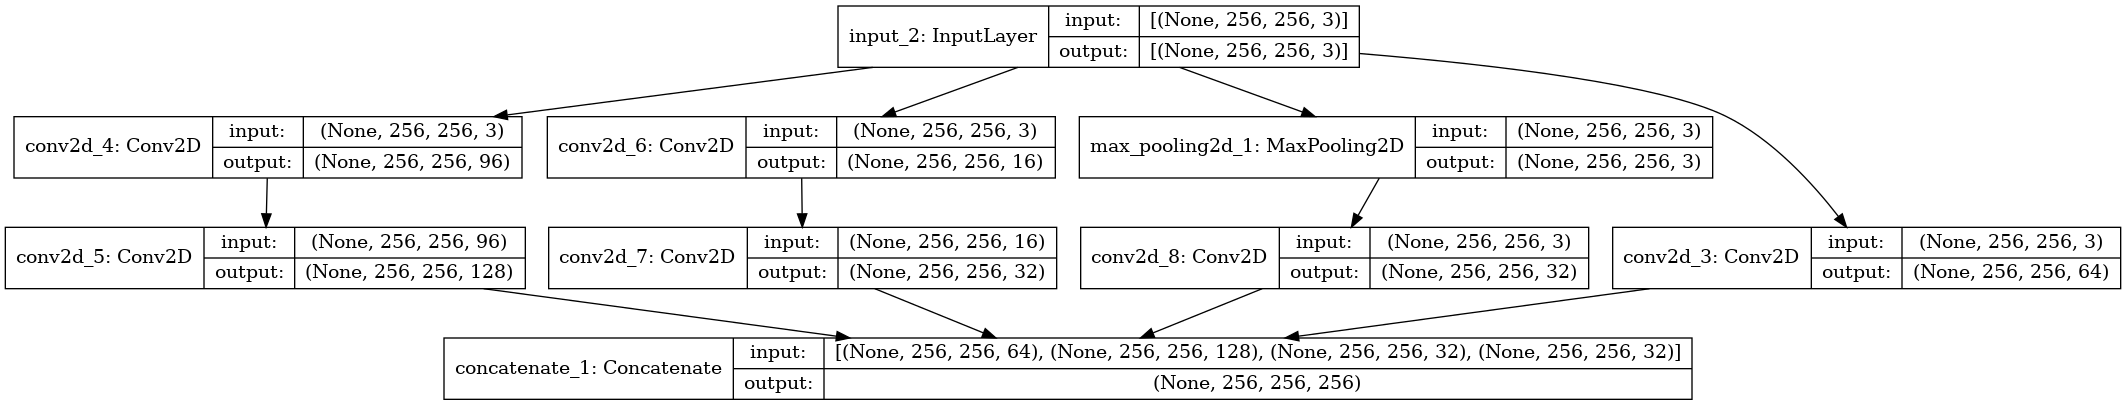

In [16]:
# 모델 구조 시각화하기
plot_model(model, show_shapes=True, 
           to_file='inception.png')

### skip connection

In [17]:
# 모델을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화

### residual_module을 정의할 때 주의점  
skip connection을 구성하기 위해서 connection을 통해서 합해지는  
feature map들의 가로x세로x채널 사이즈가 맞아야 한다

In [18]:
def residual_module(input_layer, n_filters):  
	merge_input = input_layer

# if문에서는 채널 사이즈가 동일한지 확인하고, 만일 동일하지 않다면 1x1 convolution을 통해서 채널 사이즈를 맞춰 준다.
	if input_layer.shape[-1] != n_filters:
		merge_input = keras.layers.Conv2D(n_filters, (1,1), padding='same', 
                                          activation='relu')(input_layer) 
        # n_filter로 채널 사이즈를 맞춰 준다.
        
	# Conv2D layer
	conv1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', 
                                activation='relu')(input_layer)
    
	# Conv2D layer
	conv2 = keras.layers.Conv2D(n_filters, (3,3), padding='same', 
                                activation='linear')(conv1)
	
    
  # Add를 통해서 skip connection을 구현하는 부분
	out_layer = keras.layers.Add()([conv2, merge_input])
	out_layer = keras.layers.Activation('relu')(out_layer)
 
	return out_layer

In [19]:
input = keras.layers.Input(shape=(256, 256, 3))
residual_out = residual_module(input, 64)

In [20]:
input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_3')>

In [21]:
residual_out

<KerasTensor: shape=(None, 256, 256, 64) dtype=float32 (created by layer 'activation')>

In [22]:
print(residual_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 64), dtype=tf.float32, name=None), name='activation/Relu:0', description="created by layer 'activation'")


`inputs`   
The input(s) of the model: a `keras.Input` object or list of
        `keras.Input` objects.  
        
`outputs`  
The output(s) of the model. See Functional API example below.


In [23]:
model = keras.models.Model(inputs=input, outputs=residual_out)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 256, 256, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_10[0][0]                  
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 256, 256, 64) 256         input_3[0][0]                    
____________________________________________________________________________________________

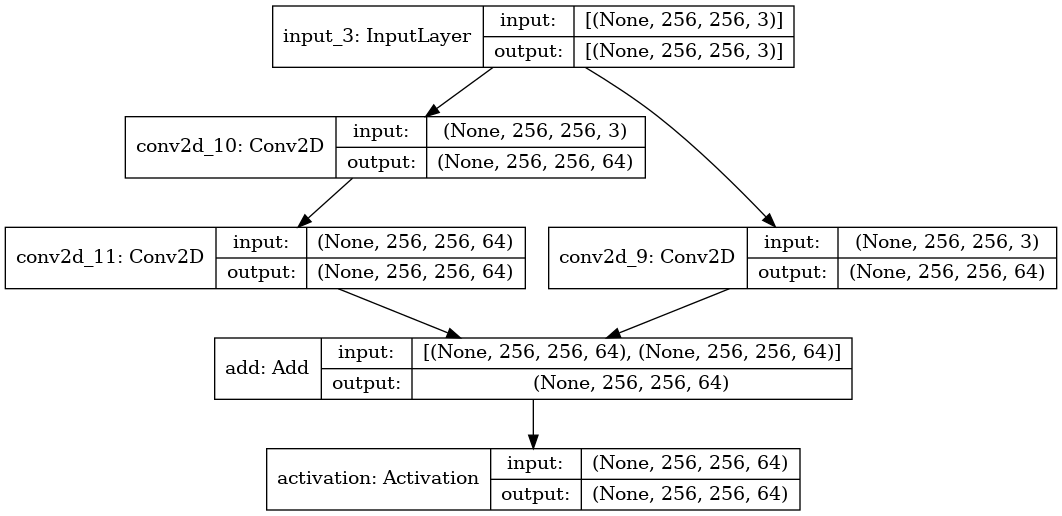

In [24]:
plot_model(model, show_shapes=True, to_file='residual_module.png')

# 63. 

In [1]:
!mkdir -p aiffel/cifar_10_small

!ln -s ~/data/cifar_10_small/train/ aiffel/cifar_10_small/train
!ln -s ~/data/cifar_10_small/test/ aiffel/cifar_10_small/test

In [6]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "whitegrid")

In [2]:
cd ~ 

/aiffel


In [3]:
ls

aiffel/  data/


`os.path.join`(a, *p)

__Join two or more pathname(경로명) components__, inserting '/' as needed.
If any component is an absolute path, all previous path components
will be discarded.  An empty last part will result in a path that
ends with a separator.

In [4]:
train_dir='data/cifar_10_small/train'
test_dir='data/cifar_10_small/test'

train_aeroplane_dir= os.path.join(train_dir,'aeroplane')
train_bird_dir=os.path.join(train_dir,'bird')
train_car_dir= os.path.join(train_dir,'car')
train_cat_dir=os.path.join(train_dir,'cat')

test_aeroplane_dir= os.path.join(test_dir,'aeroplane')
test_bird_dir=os.path.join(test_dir,'bird')
test_car_dir= os.path.join(test_dir,'car')
test_cat_dir=os.path.join(test_dir,'cat')

`os.listdir`(path=None)

Return a list containing the names of the files in the directory.

In [5]:
print('훈련용 aeroplane 이미지 전체 개수:', len(os.listdir(train_aeroplane_dir)))
print('훈련용 bird 이미지 전체 개수:', len(os.listdir(train_bird_dir)))
print('훈련용 car 이미지 전체 개수:', len(os.listdir(train_car_dir)))
print('훈련용 cat 이미지 전체 개수:', len(os.listdir(train_cat_dir)))

print('테스트용 aeroplane 이미지 전체 개수:', len(os.listdir(test_aeroplane_dir)))
print('테스트용 bird 이미지 전체 개수:', len(os.listdir(test_bird_dir)))
print('테스트용 car 이미지 전체 개수:', len(os.listdir(test_car_dir)))
print('테스트용 cat 이미지 전체 개수:', len(os.listdir(test_cat_dir)))

훈련용 aeroplane 이미지 전체 개수: 5000
훈련용 bird 이미지 전체 개수: 5000
훈련용 car 이미지 전체 개수: 5000
훈련용 cat 이미지 전체 개수: 5000
테스트용 aeroplane 이미지 전체 개수: 1000
테스트용 bird 이미지 전체 개수: 1000
테스트용 car 이미지 전체 개수: 1000
테스트용 cat 이미지 전체 개수: 1000


### 데이터 파이프 라인 생성하기

데이터를 디렉토리로부터 불러올 때  
한번에 가져올 데이터의 수인 batch size를 설정하고,  
data generator를 생성하여 데이터를 모델에 넣을 수 있도록 합니다.

우선 ImageDataGenerator 객체를 생성하여 데이터 파이프 라인을 만듭니다.  
train dataset의 generator에는  
augmentation이 포함되고,  
test dataset의 generator는 원본 상태를 유지하고  
rescaling만 적용합니다.

`tf.keras.preprocessing.image.ImageDataGenerator`  
(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    __rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0__,
    brightness_range=None,
    __shear_range=0.0,
    zoom_range=0.0__,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    __horizontal_flip=False__,
    vertical_flip=False,
    __rescale=None__,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

Generate batches of tensor image data with real-time data augmentation.

In [7]:
### data 파이프 라인 생성

# 데이터를 디렉토리로부터 불러올 때, 한번에 가져올 데이터의 수
batch_size=20

# Training 데이터의 augmentation 파이프 라인 만들기
augmentation_train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale=1./255,  # 모든 데이터의 값을 1/255로 스케일 조정
                                    rotation_range=40,  
                                    # 0~40도 사이로 이미지 회전
                                    width_shift_range=0.2,  
                                    # 전체 가로 길이를 기준으로 0.2 비율까지 가로로 이동
                                    height_shift_range=0.2,   
                                    # 전체 세로 길이를 기준으로 0.2 비율까지 가로로 이동
                                    shear_range=0.2,  
                                    # 0.2 라디안 정도까지 이미지를 기울이기
                                    zoom_range=0.2, 
                                    # 확대와 축소의 범위 [1-0.2 ~ 1+0.2 ]
                                    horizontal_flip=True,)  
                                    # 수평 기준 플립을 할 지, 하지 않을 지를 결정

# Test 데이터의 augmentation 파이프 라인 만들기
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [12]:
augmentation_train_datagen

In [13]:
test_datagen

Augmentation)n.증가율. 파이프라인을 기준으로 디렉토리로부터 데이터를 불러오는 모듈을 만듭  
train[test] dataset의 경로와 이미지 크기 등을 지정하여  
train_generator와 test_generator 생성하면 됩니다.

augmentation_train_datagen.`flow_from_directory`  
(
    __directory,
    target_size=(256, 256),
    color_mode='rgb'__,
    classes=None,
    __class_mode='categorical',
    batch_size=32,
    shuffle=True__,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
)

Takes the path to a directory & generates batches of augmented data.

In [15]:
# Augmentation 파이프라인을 기준으로 디렉토리로부터 데이터를 불러 오는 모듈 만들기
train_generator = augmentation_train_datagen.flow_from_directory(
        directory=train_dir, 
    #  어느 디렉터리에서 이미지 데이터를 가져올 것인가?
        target_size=(150, 150), 
    # 모든 이미지를 150 × 150 크기로 바꿉니다
        batch_size=batch_size, 
    # 디렉토리에서 batch size만큼의 이미지를 가져옵니다.
        interpolation='bilinear',  
    # resize를 할 때, interpolatrion 기법을 결정합니다.
        color_mode ='rgb',
        shuffle='True', 
    # 이미지를 셔플링할 지 하지 않을 지를 결정.
        class_mode='categorical') 
# multiclass의 경우이므로 class mode는 categorical

print(train_generator.class_indices)

Found 20000 images belonging to 4 classes.
{'aeroplane': 0, 'bird': 1, 'car': 2, 'cat': 3}


In [16]:
# Test 데이터 또한 디렉토리로부터 이미지를 불러오는 파이프라인을 완성해야 한다.
test_generator = test_datagen.flow_from_directory(
        directory=test_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle='True',
        interpolation='bilinear',  
    ## resize시 interpolatrion 기법
        color_mode='rgb',
        class_mode='categorical') 
#categorical

Found 4000 images belonging to 4 classes.


In [17]:
for data_batch, labels_batch in train_generator: 
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 4)


`tf.keras.applications.ResNet50`  
(
    __include_top=True,
    weights='imagenet'__,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    **kwargs,
)

Instantiates the ResNet50 architecture.

In [18]:
## back bone
conv_base=tf.keras.applications.ResNet50(weights='imagenet',
                                         include_top=False)
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

최종 모델을 구성합니다.

input layer와 ResNet50 backbone, fully-connected layer를 연결하여 transfer learning 모델을 만듭니다.

In [19]:
# 최종 모델 구성하기
input_layer = tf.keras.layers.Input(shape=(150,150,3))
x = conv_base(input_layer) 
# 위에서 불러온 pretrained model을 활용하기

# 불러온 conv_base 모델의 최종 결과물은 Conv2D 연산의 feature map과 동일
# 따라서 최종적인 Multiclass classfication을 하기 위해서는 Flatten을 해야 한다.

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
out_layer = tf.keras.layers.Dense(4, activation='softmax')(x)

conv_base는 freeze 시킴으로써 이미 학습된 파라미터 값을 그대로 사용

In [20]:
conv_base.trainable = False

In [21]:
model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 49,804,676
Trainable params: 26,216,964
Non-trainable params: 23,587,712
_________________________________________________________________


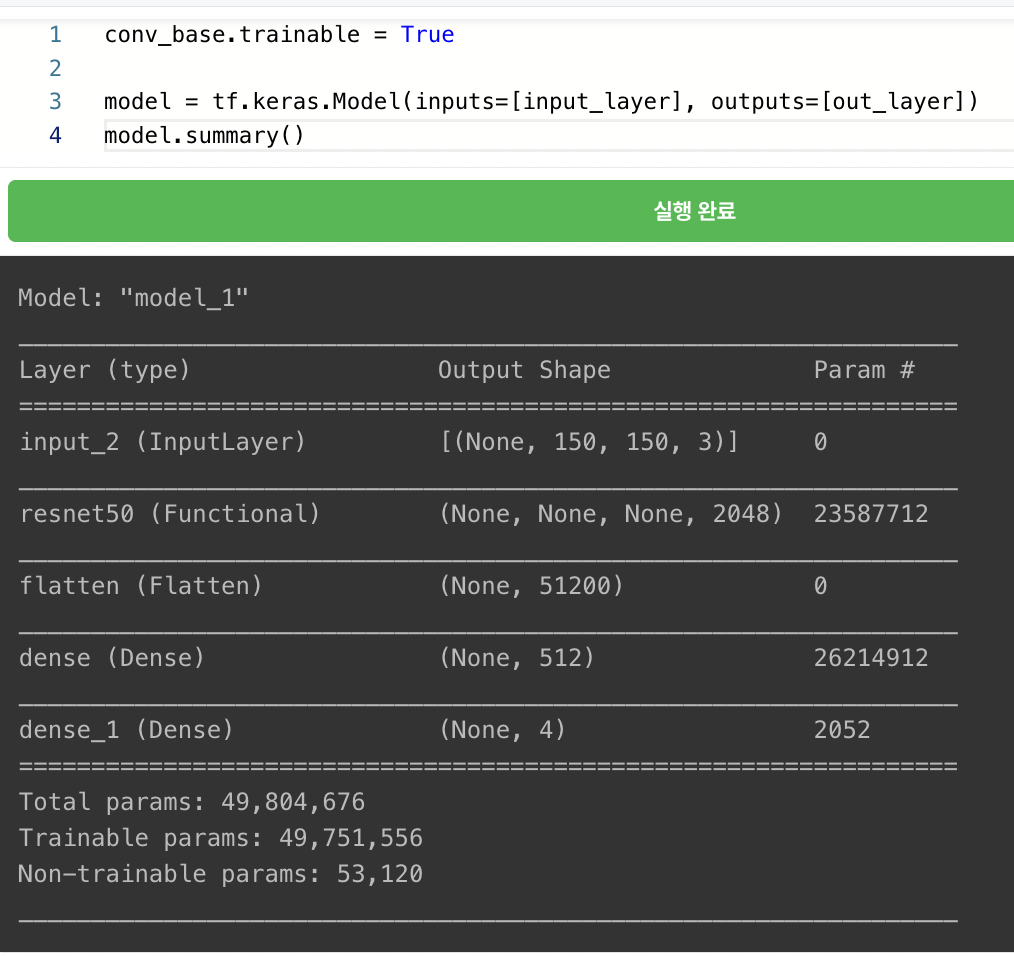

In [22]:
loss_function=tf.keras.losses.categorical_crossentropy 
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.categorical_accuracy

model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

data generator는 입력 데이터와 타겟(라벨)의 batch를 끝없이 반환합니다.
batch가 끝없이 생성되기 때문에,  
한 번의 epoch에 generator로부터 얼마나 많은 샘플을 뽑을지 모델에 전달해야 합니다.
만약 batch_size=20이고 steps_per_epoch=100일 경우  
(데이터, 라벨)의 쌍 20개가 생성되고,  
크기가 20인 batch 데이터를 100번 학습하면 1 epoch이 완료됩니다.  
단, 크기 20의 batch 데이터는 매번 랜덤으로 생성됩니다.

In [23]:
history = model.fit( 
      train_generator,
     steps_per_epoch=(len(os.listdir(train_aeroplane_dir)) + len(os.listdir(train_bird_dir)) + len(
       os.listdir(train_car_dir)) + len(os.listdir(train_cat_dir))) // batch_size,
      epochs=1,
      validation_data=test_generator,
      validation_freq=1)

1000/1000 [==============================] - 163s 157ms/step - loss: 1.3165 - categorical_accuracy: 0.3871 - val_loss: 1.0549 - val_categorical_accuracy: 0.5455


In [24]:
model.save('/aiffel/aiffel/cifar_10_small/multi_classification_augumentation_model.hdf5')

acc = history.history['categorical_accuracy'] 
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


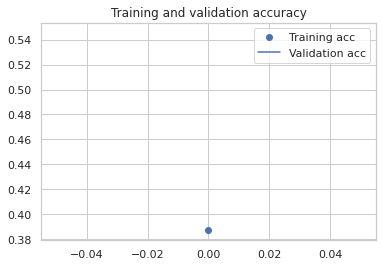

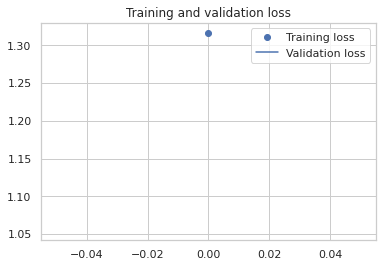

In [25]:
# # 학습한 결과 시각화 
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# epochs = 20 -> 50분 정도
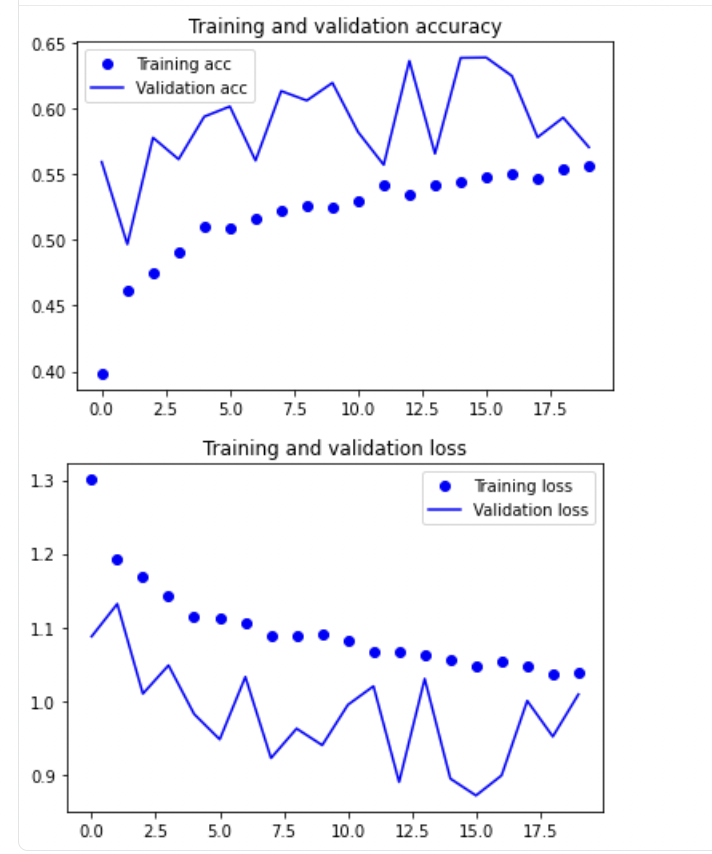

# 65.

In [1]:
!pip install graphviz
!pip install pydot

In [2]:
import tensorflow.keras.layers as layers
import tensorflow as tf

In [3]:
inputs = layers.Input(shape=(572, 572, 1))

# Contracting path 시작
# [1]
conv0 = layers.Conv2D(64, activation='relu', 
                      kernel_size = 3)(inputs)
conv1 = layers.Conv2D(64, activation='relu', 
                      kernel_size=3)(conv0)  
# Skip connection으로 Expanding path로 이어질 예정
conv2 = layers.MaxPool2D(pool_size=(2, 2), 
                         strides=(2, 2))(conv1)

# [2]
conv3 = layers.Conv2D(128, activation='relu', 
                      kernel_size=3)(conv2)
conv4 = layers.Conv2D(128, activation='relu', 
                      kernel_size=3)(conv3)  
# Skip connection으로 Expanding path로 이어질 예정
conv5 = layers.MaxPool2D(pool_size=(2, 2), 
                         strides=(2, 2))(conv4)

# [3]
conv6 = layers.Conv2D(256, activation='relu', 
                      kernel_size=3)(conv5)
conv7 = layers.Conv2D(256, activation='relu', 
                      kernel_size=3)(conv6)  
# Skip connection으로 Expanding path로 이어질 예정
conv8 = layers.MaxPool2D(pool_size=(2, 2), 
                         strides=(2, 2))(conv7)

# [4]
conv9 = layers.Conv2D(512, activation='relu', 
                      kernel_size=3)(conv8)
conv10 = layers.Conv2D(512, activation='relu', 
                       kernel_size=3)(conv9)  
# Skip connection으로 Expanding path로 이어질 예정
conv11 = layers.MaxPool2D(pool_size=(2, 2), 
                          strides=(2, 2))(conv10)

# [5]
conv12 = layers.Conv2D(1024, activation='relu', 
                       kernel_size=3)(conv11)
conv13 = layers.Conv2D(1024, activation='relu', 
                       kernel_size=3)(conv12)
# Contracting path 끝

# Expanding path 시작
# [6]
trans01 = layers.Conv2DTranspose(512, kernel_size=2, 
                                 strides=(2, 2), activation='relu')(conv13)
crop01 = layers.Cropping2D(cropping=(4, 4))(conv10)
concat01 = layers.concatenate([trans01, crop01], axis=-1)

# [7]
conv14 = layers.Conv2D(512, activation='relu', 
                       kernel_size=3)(concat01)
conv15 = layers.Conv2D(512, activation='relu', 
                       kernel_size=3)(conv14)
trans02 = layers.Conv2DTranspose(256, kernel_size=2, 
                                 strides=(2, 2), activation='relu')(conv15)

# [8]
crop02 = layers.Cropping2D(cropping=(16, 16))(conv7)
concat02 = layers.concatenate([trans02, crop02], axis=-1)

# [9]
conv16 = layers.Conv2D(256, activation='relu', 
                       kernel_size=3)(concat02)
conv17 = layers.Conv2D(256, activation='relu', 
                       kernel_size=3)(conv16)
trans03 = layers.Conv2DTranspose(128, kernel_size=2, 
                                 strides=(2, 2), activation='relu')(conv17)

# [10]
crop03 = layers.Cropping2D(cropping=(40, 40))(conv4)
concat03 = layers.concatenate([trans03, crop03], axis=-1)

# [11]
conv18 = layers.Conv2D(128, activation='relu', 
                       kernel_size=3)(concat03)
conv19 = layers.Conv2D(128, activation='relu', 
                       kernel_size=3)(conv18)
trans04 = layers.Conv2DTranspose(64, kernel_size=2, 
                                 strides=(2, 2), activation='relu')(conv19)

# [12]
crop04 = layers.Cropping2D(cropping=(88, 88))(conv1)
concat04 = layers.concatenate([trans04, crop04], axis=-1)

# [13]
conv20 = layers.Conv2D(64, activation='relu', 
                       kernel_size=3)(concat04)
conv21 = layers.Conv2D(64, activation='relu', 
                       kernel_size=3)(conv20)
# Expanding path 끝
outputs = layers.Conv2D(2, kernel_size=1)(conv21)

model = tf.keras.Model(inputs=inputs, 
                       outputs=outputs, name="u-netmodel")

`layers.Conv2D`  
(
    __filters,
    kernel_size,
    strides=(1, 1),
    padding='valid'__,
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    __activation=None__,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
     
2D convolution layer (e.g. spatial convolution over images).

`layers.Conv2DTranspose`  
(
    __filters,
    kernel_size,
    strides=(1, 1),
    padding='valid'__,
    output_padding=None,
    data_format=None,
    dilation_rate=(1, 1),
    __activation=None__,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)    
Transposed convolution layer (sometimes called Deconvolution).

`layers.Cropping2D`  
(__cropping=((0, 0), (0, 0))__, data_format=None, **kwargs)

Cropping layer for 2D input (e.g. picture).

It crops along spatial dimensions, i.e. height and width.

`tf.keras.Model`  
(*args, **kwargs)

`Model` groups layers into an object with training and inference features.

In [4]:
model.summary()

Model: "u-netmodel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 572, 572, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 570, 570, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 568, 568, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 284, 284, 64) 0           conv2d_1[0][0]                   
_________________________________________________________________________________________

위에서 구현한 U-Net 모델의 구조를 그림으로 나타낼 수 있습니다.

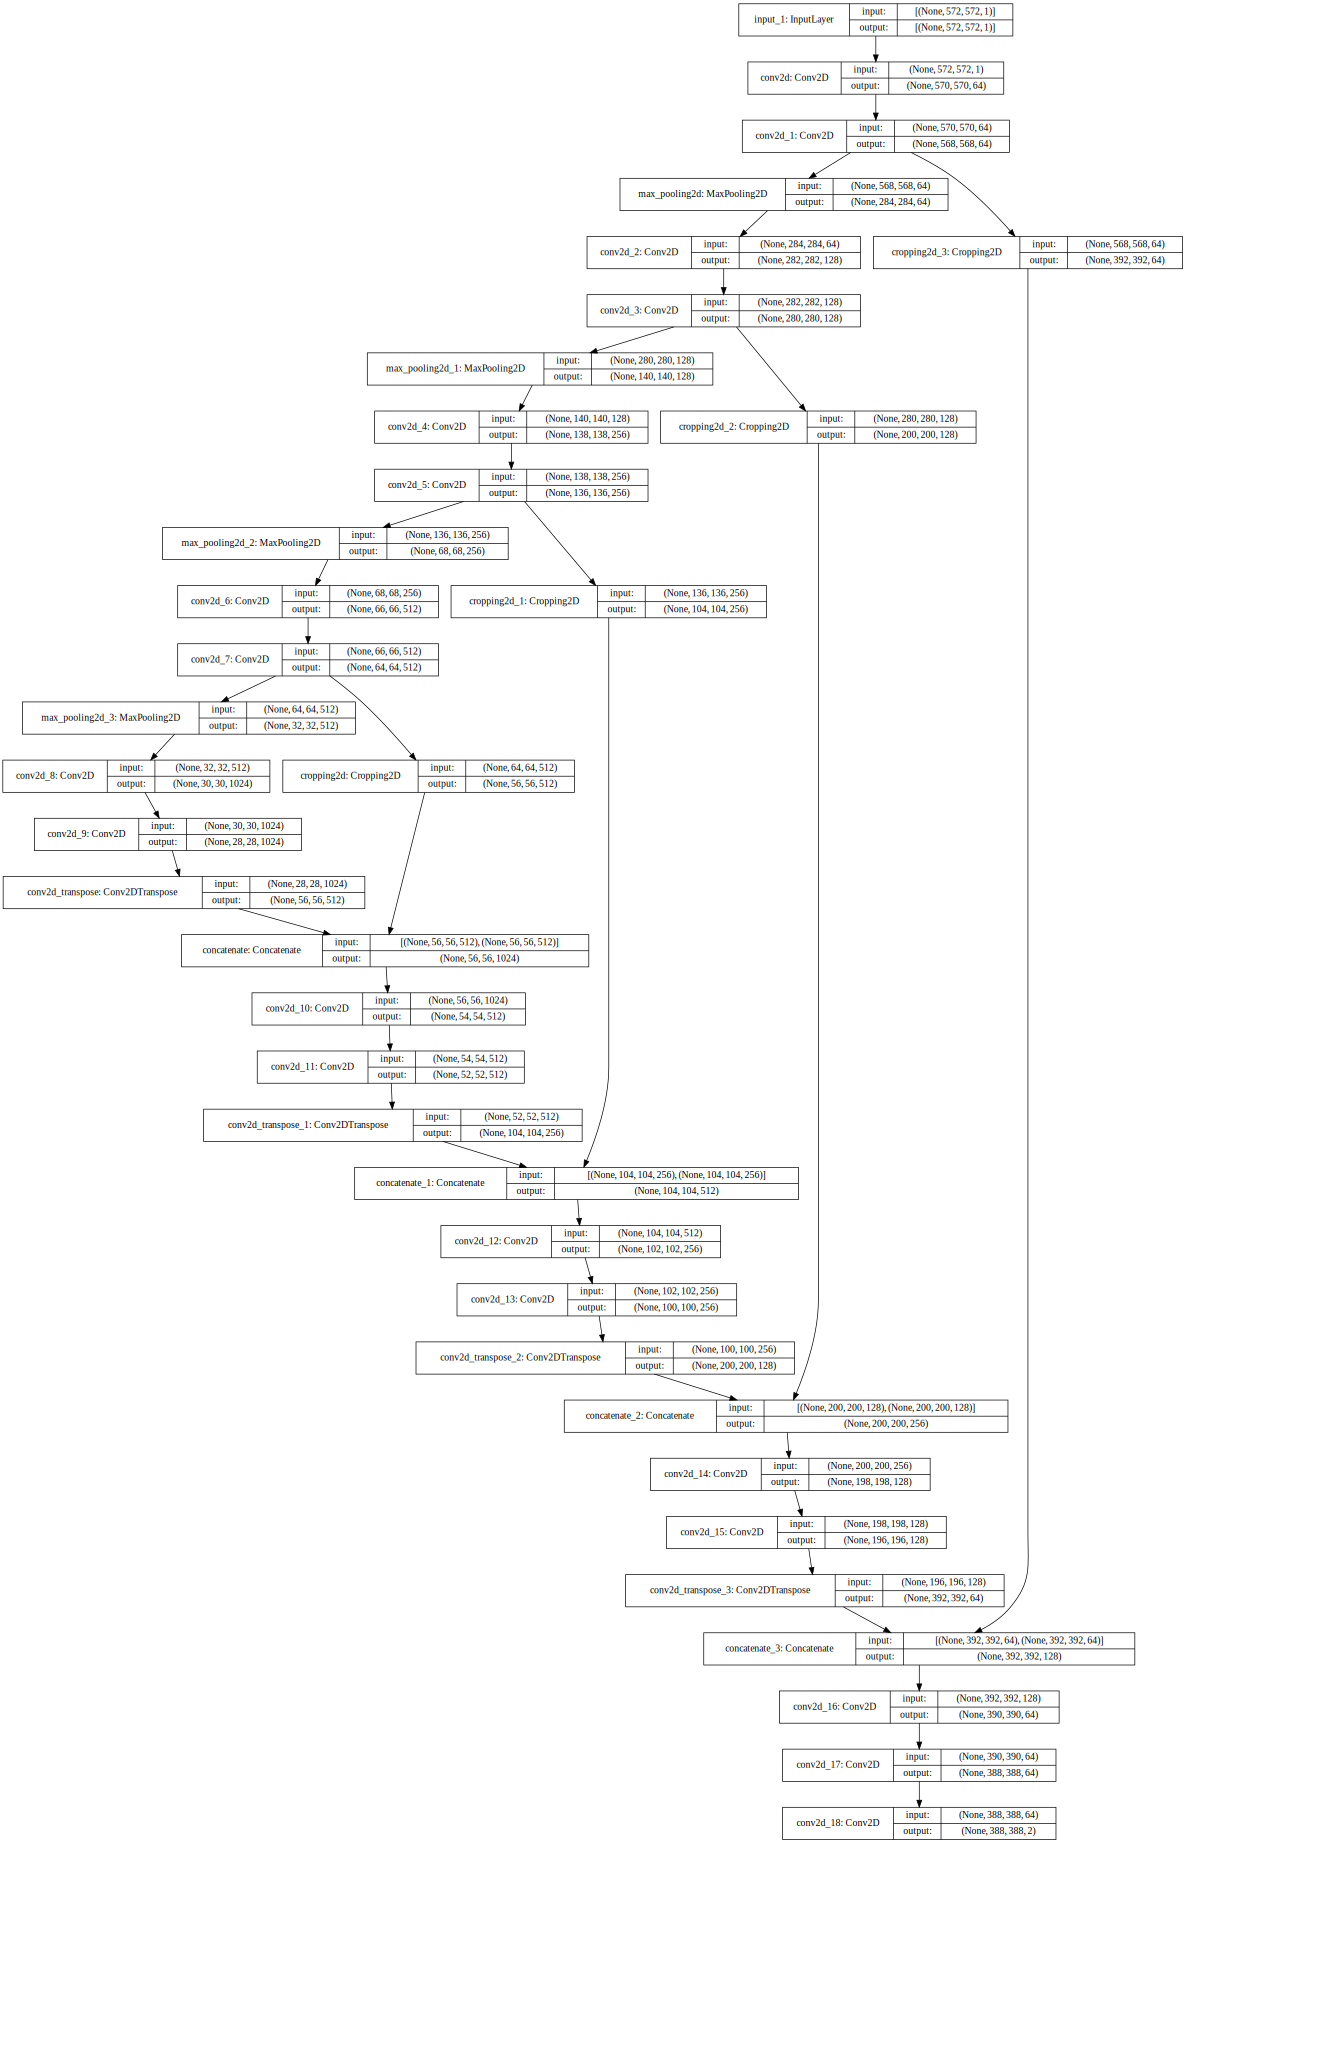

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot  

%matplotlib inline

SVG(model_to_dot(model, show_shapes= True, 
                 show_layer_names=True, dpi=80).create(prog='dot', format='svg'))  
#dpi를 작게 하면 그래프가 커집니다.

### Transposed Convolution을 코드로 살펴보기

In [6]:
# 필요한 모듈 불러오기 
import numpy as np
import tensorflow as tf

In [7]:
# input data 
X = np.asarray([[1, 2], 
			  [3, 4]])

In [8]:
# 모델에 맞게 reshaping 
X = X.reshape((1, 2, 2, 1))
# 열 1, 행 2, - 이런 덩어리가 -> 2개 - 이 덩어리가 -> 1개
print(X)
print(X.shape)

[[[[1]
   [2]]

  [[3]
   [4]]]]
(1, 2, 2, 1)


In [9]:
# 모델 만들기 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2DTranspose(1, (1, 1), strides=(2, 2), input_shape=(2, 2, 1))) # Conv2DTranspos layer
#  커널 사이즈 중 (1, 1) 부분을 다양하게 바꿔 보세요.

In [10]:
weights = [np.asarray([[[[1]]]]), np.asarray([1])] 
# weight = 1, bias = 1

In [11]:
weights

[array([[[[1]]]]), array([1])]

In [12]:
model.set_weights(weights)

In [13]:
yhat = model.predict(X) 
yhat = yhat.reshape((4, 4)) # 결과를 확인하기 편하게 reshaping
print(yhat)

[[2. 1. 3. 1.]
 [1. 1. 1. 1.]
 [4. 1. 5. 1.]
 [1. 1. 1. 1.]]


In [2]:
import numpy as np
from tensorflow import keras

In [3]:
class OxfordPets(keras.utils.Sequence):
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths
        
    def __len__(self):
        return len(self.target_img_paths) // self.batch_size
    
    def __getitem__(self, idx):
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype= "float32")
        
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size= self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype= "uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size= self.img_size, color_mode= "grayscale")
            y[j] = np.expand_dims(img, 2)
            y[j] -= 1

In [5]:
import random

val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)

train_input_img_paths = input_img_paths[: -val_samples]
train_target_img_paths = target_img_paths[: -val_samples]
val_input_img_paths = input_img_paths[: -val_samples]
val_input_img_paths = target_img_paths[: -val_samples]

NameError: name 'input_img_paths' is not defined

In [ ]:
from tensorflow.keras import layers

def get_model(img_size, num_classes):
    
    x = layers Conv2D(32, 3, strides= 2, padding= "same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    previous_block_activation = x
    
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3 padding="same")(x)    
        x = layers.BatchNormalization()(x)    

        x = layers.Activation("relu")(x)    
        x = layers.SeparableConv2D(filters, 3 padding="same")(x)    
        x = layers.BatchNormalization()(x)    

        x = layers.MaxPooling2D(3, strides= 2, padding= "same")(x)    

        residual = layers.Conv2D(filters, 1, strides= 2, padding "same")(previous_block_activation)
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, strides= 2, padding "same")(residual)
        x = layers.add([x, residual])
        previous_block_activation = x
    
    outputs = layers.Conv2D(num_classes, 3, activation= "softmax", padding "same")(x)
    
    model = keras.Model(inputs, outputs)
    
    return model

In [ ]:
model = get_model(img_size, num_classes)
model.summary()